In [16]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Linear Regression

In [17]:
# Load the data
data_folder = os.path.join(os.path.dirname(os.getcwd()), 'data', 'joined')
files = [file for file in os.listdir(data_folder) if file.endswith('joined.csv')]
data = pd.concat([pd.read_csv(os.path.join(data_folder, file)) for file in files], ignore_index=True)

# Split the data into features and target variable
X = data.drop(['name', 'salary', 'salary_adjusted'], axis=1).fillna(0)
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [18]:
from joblib import dump

# Create regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
model_folder = os.path.join(os.path.dirname(os.getcwd()), 'models')
model_file = os.path.join(model_folder, 'linear_regression.joblib')
os.makedirs(model_folder, exist_ok=True)
dump(model, model_file)


['c:\\Users\\Gabriel\\Downloads\\nba-salary-model\\models\\linear_regression.joblib']

Evaluate the model

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from joblib import load

# Load the model
model = load(model_file)
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 42915755489087.23
R2: 0.65


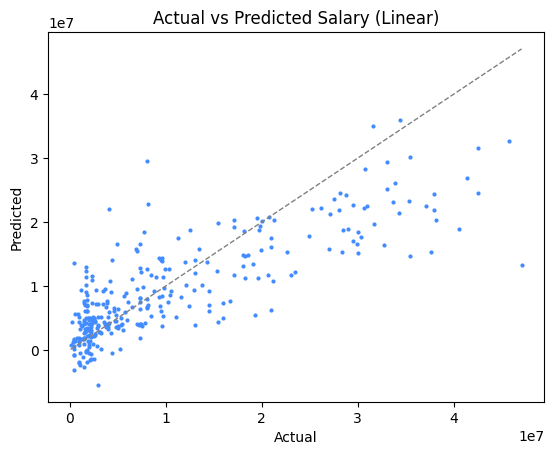

In [20]:
# Plot the results
# Plot the predicted salary vs the actual salary and line of best fit
color_hex = '#438cff'
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, marker='o', s=4, color=color_hex)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', lw=1, color='gray')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Actual vs Predicted Salary (Linear)')
plt.show()